In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import  seaborn as sns

In [44]:
df= pd.read_csv(r"C:\Users\HP\Downloads\a1_RestaurantReviews_HistoricDump.tsv",sep = '\t')
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [45]:
df.shape

(900, 2)

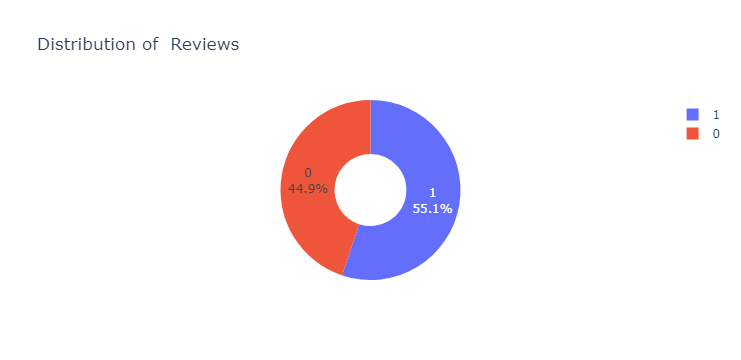

In [99]:
import plotly.graph_objects as go
values = df['Liked'].value_counts()
fig = go.Figure(data=[go.Pie(
    labels=values.index,
    values=values,
    hole=0.4, 
    textinfo='percent+label' 
)])

fig.update_layout(title_text="Distribution of  Reviews")
fig.show()

In [46]:
df1= df

In [47]:
import re 

## Lower Casing the Chatacters 

In [48]:
df1['Review']= df['Review'].str.lower()

In [49]:
df1['Review']

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
895    i want to first say our server was great and w...
896                       the pizza selections are good.
897                i had strawberry tea, which was good.
898    highly unprofessional and rude to a loyal patron!
899                         overall, a great experience.
Name: Review, Length: 900, dtype: object

## Removing Punctuations

In [50]:
import string

In [51]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
punctuations =string.punctuation

In [53]:
def removep(review):
    return review.translate(str.maketrans('','',punctuations))

In [54]:
df1['Review'].apply(removep)

0                                   wow loved this place
1                                      crust is not good
2               not tasty and the texture was just nasty
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
895    i want to first say our server was great and w...
896                        the pizza selections are good
897                  i had strawberry tea which was good
898     highly unprofessional and rude to a loyal patron
899                           overall a great experience
Name: Review, Length: 900, dtype: object

In [55]:
df1['Review'][3]

'stopped by during the late may bank holiday off rick steve recommendation and loved it.'

## Converting Slangs into propper words if review have any

In [56]:
slang_dict = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek You (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A** Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A**",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A** Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That Feeling When",
    "MFW": "My Face When",
    "MRW": "My Reaction When",
    "IFYP": "I Feel Your Pain",
    "TNTL": "Trying Not To Laugh",
    "JK": "Just Kidding",
    "IDC": "I Don’t Care",
    "ILY": "I Love You",
    "IMU": "I Miss You",
    "ADIH": "Another Day In Hell",
    "ZZZ": "Sleeping, Bored, Tired",
    "WYWH": "Wish You Were Here",
    "TIME": "Tears In My Eyes",
    "BAE": "Before Anyone Else",
    "FIMH": "Forever In My Heart",
    "BSAAW": "Big Smile And A Wink",
    "BWL": "Bursting With Laughter",
    "BFF": "Best Friends Forever",
    "CSL": "Can’t Stop Laughing"
}


In [61]:
def slangt(text):
    new_text = []
    for w in text.split():
        if w.upper() in slang_dict:
            new_text.append(slang_dict[w.upper()])
        else:
            new_text.append(w)
    
    return " ".join(new_text)

In [63]:
df1['Processed_Review'] = df1['Review'].apply(lambda x: slangt(x))
print(df1['Processed_Review'][3])

stopped by during the late may bank holiday off rick steve recommendation and loved it.


In [64]:
df1.drop('Review', axis=1, inplace=True)

In [65]:
df1['Processed_Review']=df1['Processed_Review'].apply(removep)

In [66]:
df1.head()

,Liked,Processed_Review
0,1,wow loved this place
1,0,crust is not good
2,0,not tasty and the texture was just nasty
3,1,stopped by during the late may bank holiday of...
4,1,the selection on the menu was great and so wer...


## Data Cleaning 

In [67]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
corpus=[]
for x in range(0, 900):
    text= re.sub('[^a-z,A-Z]', ' ', df1['Processed_Review'][x])
    text= text.split()
    text= [ps.stem(word) for word in text if not word in set(all_stopwords)]
    text= ' '.join(text)
    corpus.append(text)

In [69]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didnt tast fresh',
 'potato like rubber could tell made ahead tear in my eye kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberrymmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'that rightth red velvet cakeohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent dea

## Data Transformation

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

CV = CountVectorizer()
TD= TfidfVectorizer()
# you can chose anyone of these 

In [71]:
x= CV.fit_transform(corpus).toarray()
y= df1['Liked']

In [72]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
y

0      1
1      0
2      0
3      1
4      1
      ..
895    1
896    1
897    1
898    0
899    1
Name: Liked, Length: 900, dtype: int64

In [74]:
import pickle
with open("bow_vectorizer.pkl", "wb") as f:
    pickle.dump(CV, f)

# Save the BoW Matrix (optional)
with open("bow_matrix.pkl", "wb") as f:
    pickle.dump(x, f)

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=69)

## Model training

A) Naive Bayes: 
1. Great for text classification tasks like sentiment analysis.
2. Often performs well with sparse features like BoW or TF-IDF


B) Support Vector Machines (SVM):
1. Performs well on text data with TF-IDF features.
2. Useful for datasets with clear separability between classes.

In [76]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [77]:
# Exporting NB Classifier to later use in prediction
import joblib
joblib.dump(classifier, 'c2_Classifier_Sentiment_Model') 

['c2_Classifier_Sentiment_Model']

In [78]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[46 32]
 [18 84]]


0.7222222222222222

## Using SVM model

In [79]:
from sklearn.svm import SVC

In [80]:
svm_model = SVC(kernel='linear')  # You can try 'linear', 'rbf', etc.
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [81]:
y_pred = svm_model.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[57 21]
 [15 87]]


0.8

we got better accuracy using svm model 

In [96]:
import joblib
joblib.dump(svm_model, 'c3_Classifier_Sentiment_Model') 

['c3_Classifier_Sentiment_Model']